# **🍽️ Restaurant Tips Analysis**

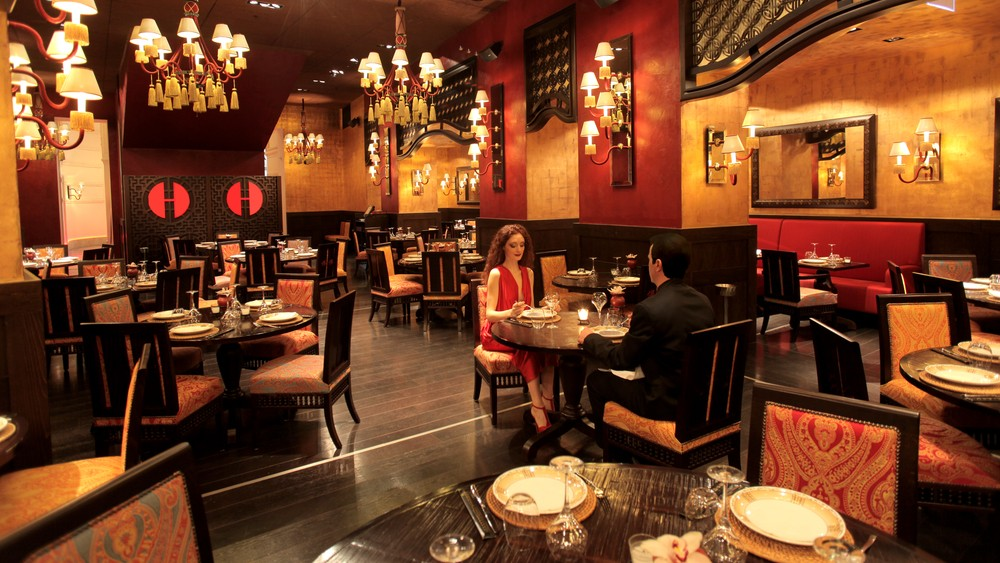

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [38]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [39]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')


### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [40]:
# PUT YOUR CODE HERE
df.head(10)


,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2.00,Male,No,Sun,Dinner,2
7,7,26.88,3.12,Male,No,Sun,Dinner,4
8,8,15.04,1.96,Male,No,Sun,Dinner,2
9,9,14.78,3.23,Male,No,Sun,Dinner,2


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [41]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

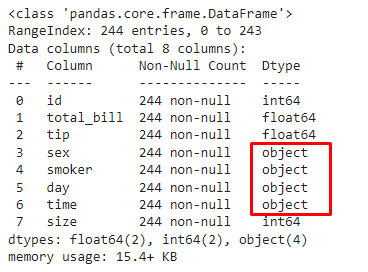

Let's fix their types and make them string:

In [42]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()

Check again (output columns and their types):

In [43]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [44]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [45]:
# PUT YOUR CODE HERE
smokers_df = df[df['smoker'] == 'Yes']

Check whether everything is okay. Output a test sample (5 random rows):

In [46]:
# PUT YOUR CODE HERE
smokers_df.sample(5)


,id,total_bill,tip,sex,smoker,day,time,size
209,209,12.76,2.23,Female,Yes,Sat,Dinner,2
102,102,44.3,2.5,Female,Yes,Sat,Dinner,3
196,196,10.34,2.0,Male,Yes,Thur,Lunch,2
67,67,3.07,1.0,Female,Yes,Sat,Dinner,1
240,240,27.18,2.0,Female,Yes,Sat,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [47]:
# PUT YOUR CODE HERE
non_smokers_df = df[df['smoker'] == 'No']


Check whether everything is okay. Output a test sample (5 random rows):

In [48]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)


,id,total_bill,tip,sex,smoker,day,time,size
3,3,23.68,3.31,Male,No,Sun,Dinner,2
34,34,17.78,3.27,Male,No,Sat,Dinner,2
44,44,30.4,5.6,Male,No,Sun,Dinner,4
43,43,9.68,1.32,Male,No,Sun,Dinner,2
140,140,17.47,3.5,Female,No,Thur,Lunch,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [49]:
# YOUR CODE
common_tip_min = df['tip'].min()
common_tip_max = df['tip'].max()
common_tip_mean = df['tip'].mean()
common_tip_median = df['tip'].median()


Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [50]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [51]:
# YOUR CODE
smokers_tip_min = smokers_df['tip'].min()
smokers_tip_max = smokers_df['tip'].max()
smokers_tip_mean = smokers_df['tip'].mean()
smokers_tip_median = smokers_df['tip'].median()


Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [52]:
# YOUR CODE
# Make a list of values
smokers_tip_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_tip_values = map(lambda x: round(x, 4), smokers_tip_values)

# Make a dataframe from the list
smokers_tip_mct = pd.DataFrame(smokers_tip_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_tip_mct



,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [53]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df['tip'].min()
non_smokers_tip_max = non_smokers_df['tip'].max()
non_smokers_tip_mean = non_smokers_df['tip'].mean()
non_smokers_tip_median  = non_smokers_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [54]:
# YOUR CODE
non_smokers_tip_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
smokers_tnon_smokers_tip_valuesip_values = map(lambda x: round(x, 4), non_smokers_tip_values)

# Make a dataframe from the list
non_smokers_tip_mct = pd.DataFrame(non_smokers_tip_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_tip_mct


,0
min,1.000000
max,9.000000
mean,2.991854
median,2.740000


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [55]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1 – Người hút thuốc (Smokers) tip nhiều hơn trung bình:

Mean tip của nhóm Smokers là 3.09, cao hơn cả nhóm Non-smokers (2.99) lẫn trung bình chung (2.99).

Median (trung vị) của nhóm Smokers là 3.00, cũng cao hơn Non-smokers (2.74).

Ý nghĩa: Những người hút thuốc có xu hướng tip cao hơn một chút so với người không hút thuốc. Điều này có thể phản ánh hành vi chi tiêu hoặc tâm lý khách hàng của nhóm này.

2. Insight 2 – Người không hút thuốc có mức tip phân bố thấp hơn:

Max tip của Non-smokers là 9, thấp hơn mức tối đa của hai nhóm còn lại (10).

Median thấp nhất cũng thuộc về nhóm Non-smokers (2.74), cho thấy đa số tip nhỏ hơn so với nhóm khác.

Ý nghĩa: Khách không hút thuốc thường tip ở mức thấp hơn, cả về trung bình và trung vị. Phân phối tip của họ có vẻ nghiêng về phía thấp.



**General conclusion:**

Nhóm khách hút thuốc có xu hướng tip nhiều hơn so với nhóm không hút thuốc, cả về giá trị trung bình lẫn trung vị.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

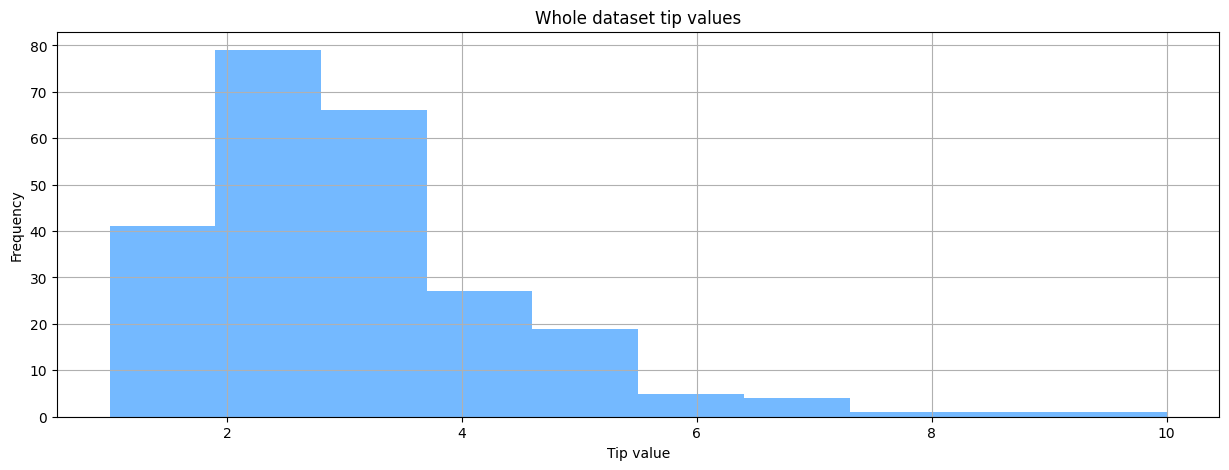

In [56]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df['tip'], color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)


##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

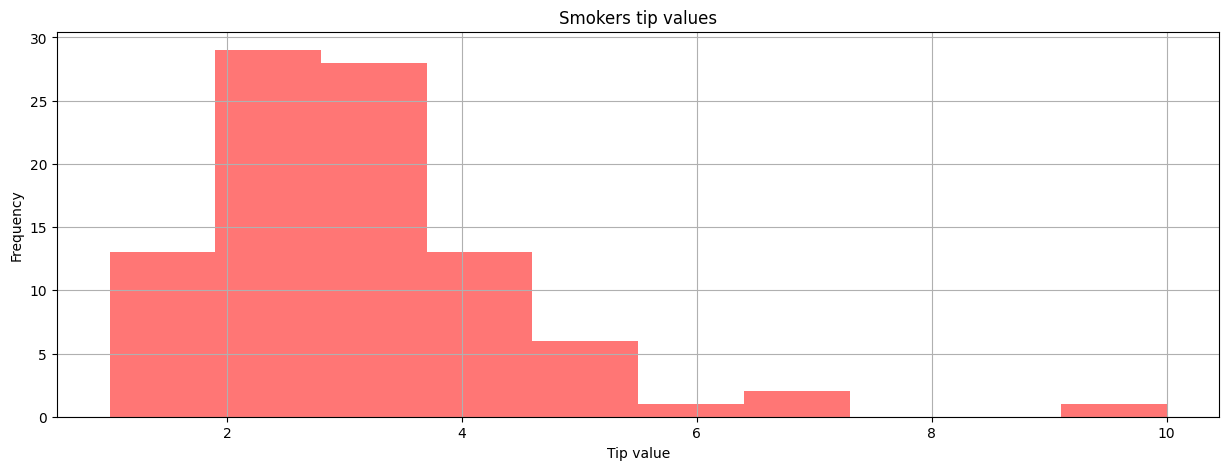

In [57]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(smokers_df['tip'], color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)


##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

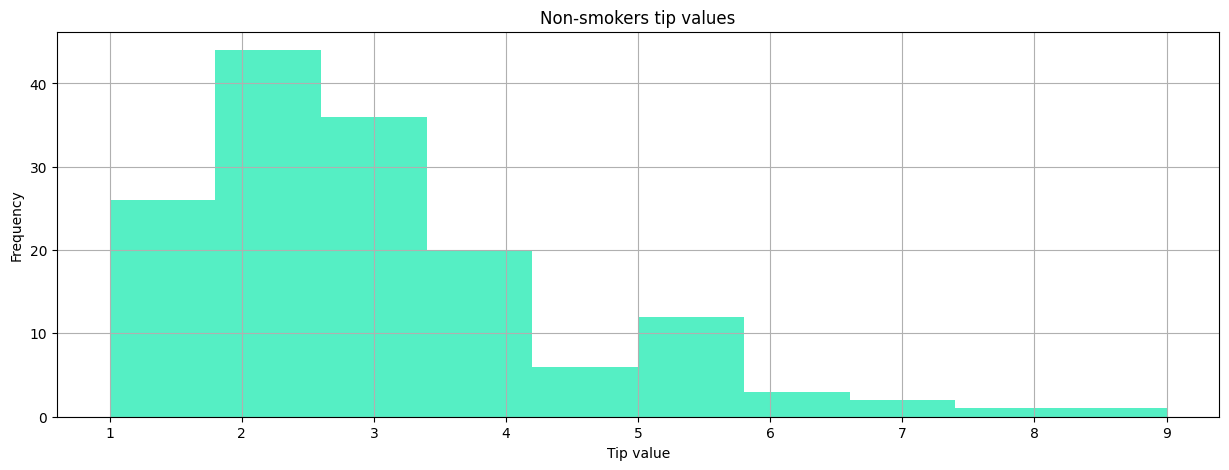

In [58]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df['tip'], color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)


##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

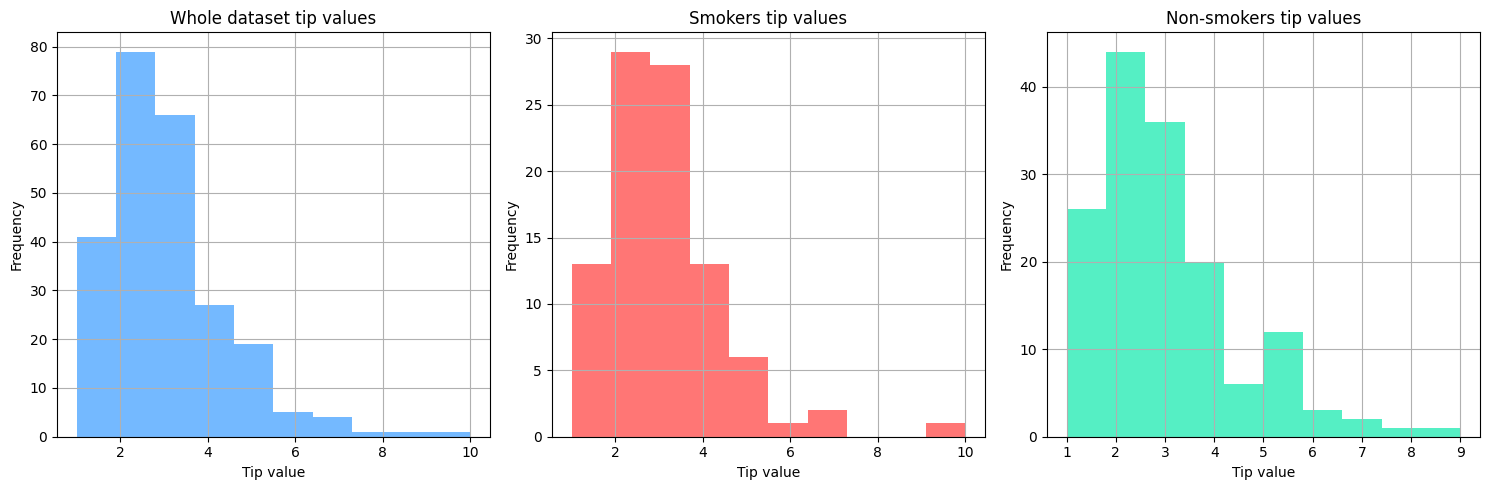

In [59]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['tip'], color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(smokers_df['tip'], color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.hist(non_smokers_df['tip'], color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)

plt.tight_layout()
plt.show()



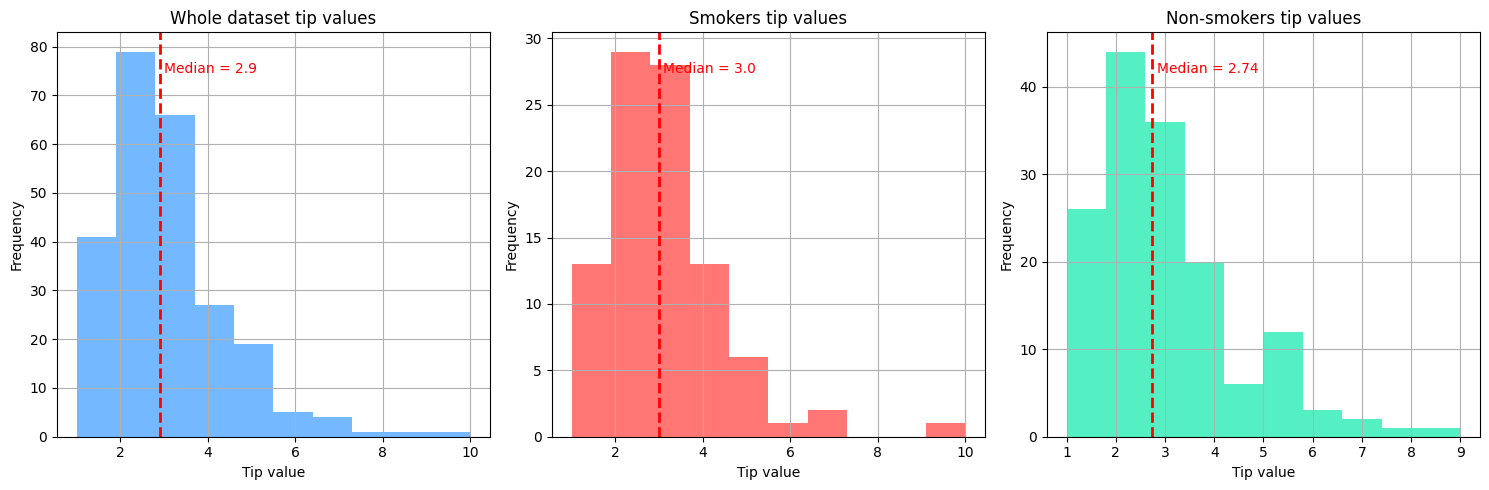

In [60]:
plt.figure(figsize=(15, 5))

# Subplot 1: Whole dataset
plt.subplot(1, 3, 1)
plt.hist(df['tip'], color='#74b9ff')
median_all = df['tip'].median()
plt.axvline(median_all, color='red', linestyle='--', linewidth=2, label='Median')
plt.text(median_all + 0.1, plt.ylim()[1]*0.9, f'Median = {round(median_all, 2)}', color='red')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)

# Subplot 2: Smokers
plt.subplot(1, 3, 2)
plt.hist(smokers_df['tip'], color='#ff7675')
median_smokers = smokers_df['tip'].median()
plt.axvline(median_smokers, color='red', linestyle='--', linewidth=2, label='Median')
plt.text(median_smokers + 0.1, plt.ylim()[1]*0.9, f'Median = {round(median_smokers, 2)}', color='red')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)

# Subplot 3: Non-smokers
plt.subplot(1, 3, 3)
plt.hist(non_smokers_df['tip'], color='#55efc4')
median_non_smokers = non_smokers_df['tip'].median()
plt.axvline(median_non_smokers, color='red', linestyle='--', linewidth=2, label='Median')
plt.text(median_non_smokers + 0.1, plt.ylim()[1]*0.9, f'Median = {round(median_non_smokers, 2)}', color='red')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)

plt.tight_layout()
plt.show()


##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1

**General conclusion:**

Nhóm khách hút thuốc có xu hướng tip cao hơn một chút so với nhóm không hút thuốc, tuy nhiên mức chênh lệch này không đáng kể. Với bộ dữ liệu hiện tại, sự khác biệt này có thể không mang ý nghĩa thống kê nếu không được kiểm chứng thêm bằng các phân tích tiếp theo.

### **👨👩 Do males give more tips?**

In [61]:
import pandas as pd

males_df = df[df['sex'] == 'Male']
females_df = df[df['sex'] == 'Female']

males_tip_min = males_df['tip'].min()
males_tip_max = males_df['tip'].max()
males_tip_mean = males_df['tip'].mean()
males_tip_median = males_df['tip'].median()

males_tip_values = [males_tip_min, males_tip_max, males_tip_mean, males_tip_median]
# Round all the values to 4 decimal places
males_tip_values = list(map(lambda x: round(x, 4), males_tip_values))  # Convert map to list
# Make a dataframe from the list
males_tip_mct = pd.DataFrame(males_tip_values, index=['min', 'max', 'mean', 'median'])

# Output the dataframe
males_tip_mct


,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


In [62]:
import pandas as pd

males_df = df[df['sex'] == 'Male']
females_df = df[df['sex'] == 'Female']

females_tip_min = females_df['tip'].min()
females_tip_max = females_df['tip'].max()
females_tip_mean = females_df['tip'].mean()
females_tip_median = females_df['tip'].median()

females_tip_values = [females_tip_min, females_tip_max, females_tip_mean, females_tip_median]
# Round all the values to 4 decimal places
females_tip_values = list(map(lambda x: round(x, 4), females_tip_values))  # Convert map to list
# Make a dataframe from the list
females_tip_mct = pd.DataFrame(females_tip_values, index=['min', 'max', 'mean', 'median'])

# Output the dataframe
females_tip_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


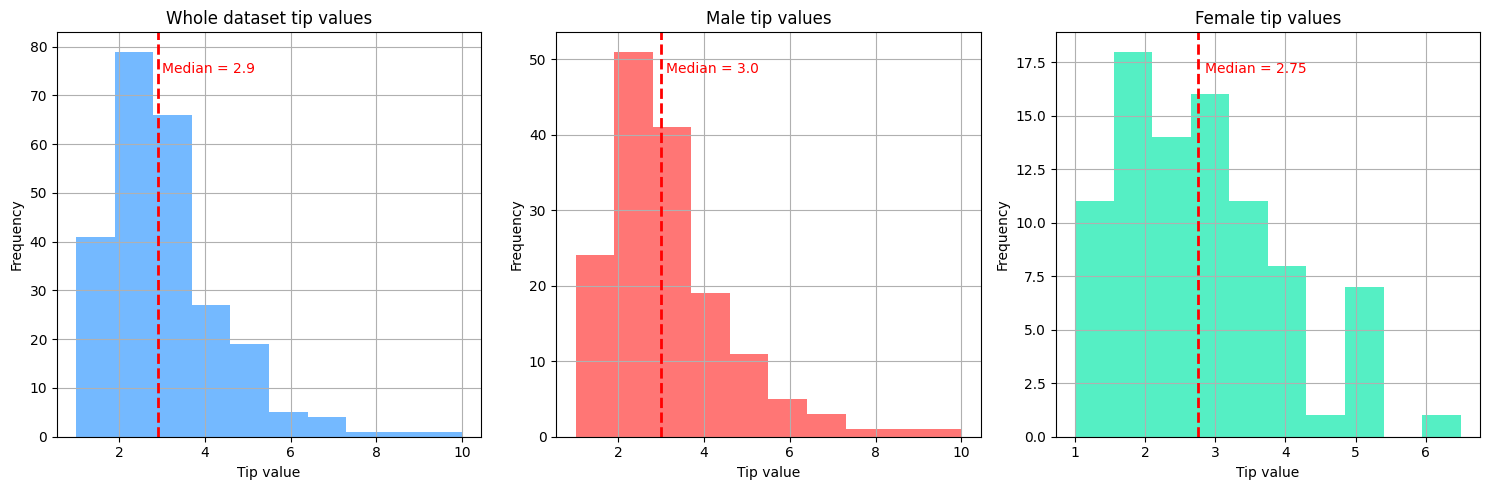

In [63]:
plt.figure(figsize=(15, 5))

# Subplot 1: Whole dataset
plt.subplot(1, 3, 1)
plt.hist(df['tip'], color='#74b9ff')
median_all = df['tip'].median()
plt.axvline(median_all, color='red', linestyle='--', linewidth=2, label='Median')
plt.text(median_all + 0.1, plt.ylim()[1]*0.9, f'Median = {round(median_all, 2)}', color='red')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)

# Subplot 2: Male
plt.subplot(1, 3, 2)
male_df = df[df['sex'] == 'Male']
plt.hist(male_df['tip'], color='#ff7675')
median_male = male_df['tip'].median()
plt.axvline(median_male, color='red', linestyle='--', linewidth=2, label='Median')
plt.text(median_male + 0.1, plt.ylim()[1]*0.9, f'Median = {round(median_male, 2)}', color='red')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Male tip values')
plt.grid(True)

# Subplot 3: Female
plt.subplot(1, 3, 3)
female_df = df[df['sex'] == 'Female']
plt.hist(female_df['tip'], color='#55efc4')
median_female = female_df['tip'].median()
plt.axvline(median_female, color='red', linestyle='--', linewidth=2, label='Median')
plt.text(median_female + 0.1, plt.ylim()[1]*0.9, f'Median = {round(median_female, 2)}', color='red')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Female tip values')
plt.grid(True)

plt.tight_layout()
plt.show()


In [64]:

from scipy.stats import mannwhitneyu

males_tips = males_df['tip']
females_tips = df[df['sex'] == 'Female']['tip']

# Kiểm thử 1 phía H0: X <= Y, H1: X > Y
u_stat, p_value = mannwhitneyu(males_tips, females_tips, alternative='greater')

print(f"U-statistic: {u_stat}")
print(f"One-sided p-value: {p_value}")

# Kiểm thử 2 phía H0: phân phối 2 nhóm như nhau H1: phân phối 2 nhóm khác nhau
u_stat, p_value_u = mannwhitneyu(males_tips, females_tips, alternative='two-sided')
print(f"Mann-Whitney U test: p-value = {p_value_u}")

U-statistic: 7289.5
One-sided p-value: 0.19167724679681963
Mann-Whitney U test: p-value = 0.38335449359363927


Với p-value của kiểm định một phía ≈ 0.1917 và hai phía ≈ 0.3834 (đều > 0.05), ta không có đủ bằng chứng thống kê để kết luận rằng tiền tip giữa nam và nữ có sự khác biệt.
Nói cách khác, tip của khách nam và khách nữ không khác biệt đáng kể trong tập dữ liệu này.

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

In [65]:
# Split into weekend and weekday based on 'day' column
weekend_days = ['Sat', 'Sun']
weekday_days = ['Thur', 'Fri']

weekend_df = df[df['day'].isin(weekend_days)]
weekday_df = df[df['day'].isin(weekday_days)]

# Descriptive statistics
weekend_min = weekend_df['tip'].min()
weekend_max = weekend_df['tip'].max()
weekend_mean = weekend_df['tip'].mean()
weekend_median = weekend_df['tip'].median()

weekday_min = weekday_df['tip'].min()
weekday_max = weekday_df['tip'].max()
weekday_mean = weekday_df['tip'].mean()
weekday_median = weekday_df['tip'].median()

# Make dataframes
weekend_tip_values = list(map(lambda x: round(x, 4), [weekend_min, weekend_max, weekend_mean, weekend_median]))
weekday_tip_values = list(map(lambda x: round(x, 4), [weekday_min, weekday_max, weekday_mean, weekday_median]))

weekend_tip_df = pd.DataFrame(weekend_tip_values, index=['min', 'max', 'mean', 'median'])
weekday_tip_df = pd.DataFrame(weekday_tip_values, index=['min', 'max', 'mean', 'median'])

# Display
weekend_tip_df


,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


In [66]:
weekday_tip_df

,0
min,1.0000
max,6.7000
mean,2.7628
median,2.5000


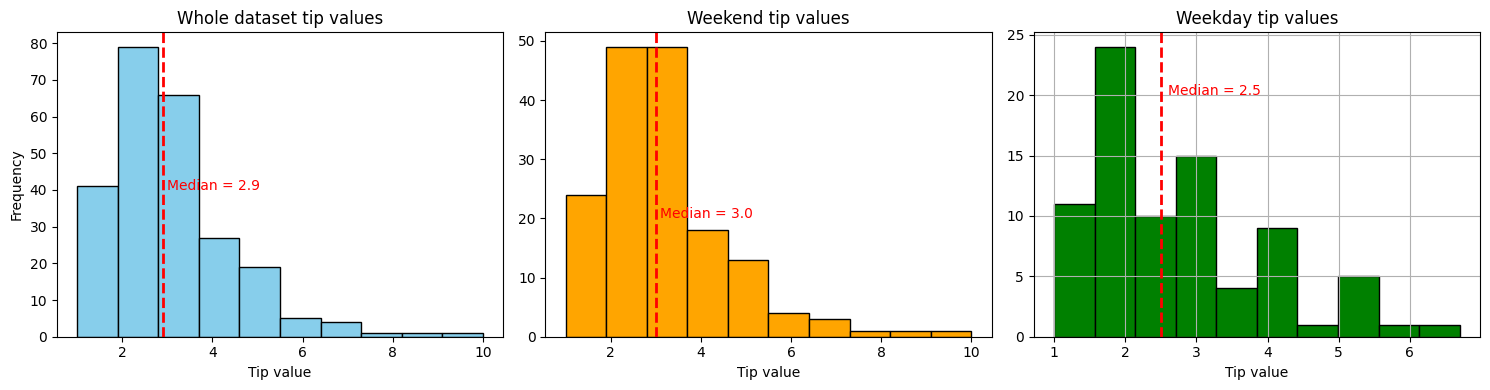

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

# Whole dataset
plt.subplot(1, 3, 1)
plt.hist(df['tip'], color='skyblue', edgecolor='black')
plt.axvline(df['tip'].median(), color='red', linestyle='--', linewidth=2)
plt.title('Whole dataset tip values')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.text(df['tip'].median() + 0.1, 40, f"Median = {round(df['tip'].median(), 2)}", color='red')

# Weekend
plt.subplot(1, 3, 2)
plt.hist(weekend_df['tip'], color='orange', edgecolor='black')
plt.axvline(weekend_median, color='red', linestyle='--', linewidth=2)
plt.title('Weekend tip values')
plt.xlabel('Tip value')
plt.text(weekend_median + 0.1, 20, f"Median = {round(weekend_median, 2)}", color='red')

# Weekday
plt.subplot(1, 3, 3)
plt.hist(weekday_df['tip'], color='green', edgecolor='black')
plt.axvline(weekday_median, color='red', linestyle='--', linewidth=2)
plt.title('Weekday tip values')
plt.xlabel('Tip value')
plt.text(weekday_median + 0.1, 20, f"Median = {round(weekday_median, 2)}", color='red')

plt.tight_layout()
plt.grid(True)
plt.show()


In [68]:
from scipy.stats import mannwhitneyu

# One-tailed: Weekend > Weekday
u_stat_1, p_value_1 = mannwhitneyu(weekend_df['tip'], weekday_df['tip'], alternative='greater')

# Two-tailed: Weekend ≠ Weekday
u_stat_2, p_value_2 = mannwhitneyu(weekend_df['tip'], weekday_df['tip'], alternative='two-sided')

print(f"U-statistic: {u_stat_1}")
print(f"One-sided p-value: {p_value_1:.4f}")
print(f"Two-sided p-value: {p_value_2:.4f}")


U-statistic: 7619.5
One-sided p-value: 0.0248
Two-sided p-value: 0.0496


Với p-value = 0.0248 từ kiểm định một phía, ta có đủ bằng chứng để kết luận rằng khách hàng vào cuối tuần có xu hướng tip nhiều hơn so với ngày thường.

Kết quả từ kiểm định hai phía (p = 0.0496) cũng xác nhận rằng sự khác biệt giữa hai nhóm là có ý nghĩa thống kê ở mức độ α = 0.05.

 1. Cuối tuần có tiềm năng doanh thu tip cao hơn
Khách hàng vào cuối tuần tip nhiều hơn với độ tin cậy thống kê (p ≈ 0.025).

-Đây là dấu hiệu rõ ràng rằng hành vi chi tiêu và hào phóng của khách hàng tăng vào cuối tuần, có thể do:

-Tâm lý thư giãn, ít áp lực

-Đi ăn theo nhóm, gia đình, bạn bè

-Thời gian ở lại nhà hàng lâu hơn

 2. Chiến lược vận hành:

-Tăng cường nhân sự vào cuối tuần:
-Nhân viên phục vụ giỏi, nhanh nhẹn nên được ưu tiên xếp ca cuối tuần để tối ưu hóa trải nghiệm và gia tăng tip.

-Ưu tiên chăm sóc nhóm khách cuối tuần:

-Có thể đào tạo nhân viên nhận biết nhóm khách “high-tip” để phục vụ chu đáo hơn.

3. Gợi ý chương trình khuyến mãi linh hoạt:

-Chẳng hạn như “Tặng món tráng miệng miễn phí khi hóa đơn cuối tuần > 500k” → khuyến khích chi tiêu & giữ chân khách.

### **🕑 Do dinners bring more tips?**

In [69]:
# Chia dữ liệu theo time: Lunch vs Dinner
lunch_df = df[df['time'] == 'Lunch']
dinner_df = df[df['time'] == 'Dinner']

# Lunch stats
lunch_min = lunch_df['tip'].min()
lunch_max = lunch_df['tip'].max()
lunch_mean = lunch_df['tip'].mean()
lunch_median = lunch_df['tip'].median()

# Dinner stats
dinner_min = dinner_df['tip'].min()
dinner_max = dinner_df['tip'].max()
dinner_mean = dinner_df['tip'].mean()
dinner_median = dinner_df['tip'].median()

# Làm DataFrame thống kê
lunch_tip_stats = pd.DataFrame(
    [round(x, 2) for x in [lunch_min, lunch_max, lunch_mean, lunch_median]],
    index=['min', 'max', 'mean', 'median'],
    columns=['Lunch']
)

dinner_tip_stats = pd.DataFrame(
    [round(x, 2) for x in [dinner_min, dinner_max, dinner_mean, dinner_median]],
    index=['min', 'max', 'mean', 'median'],
    columns=['Dinner']
)

# Gộp bảng
pd.concat([lunch_tip_stats, dinner_tip_stats], axis=1)


,Lunch,Dinner
min,1.25,1.0
max,6.70,10.0
mean,2.73,3.1
median,2.25,3.0


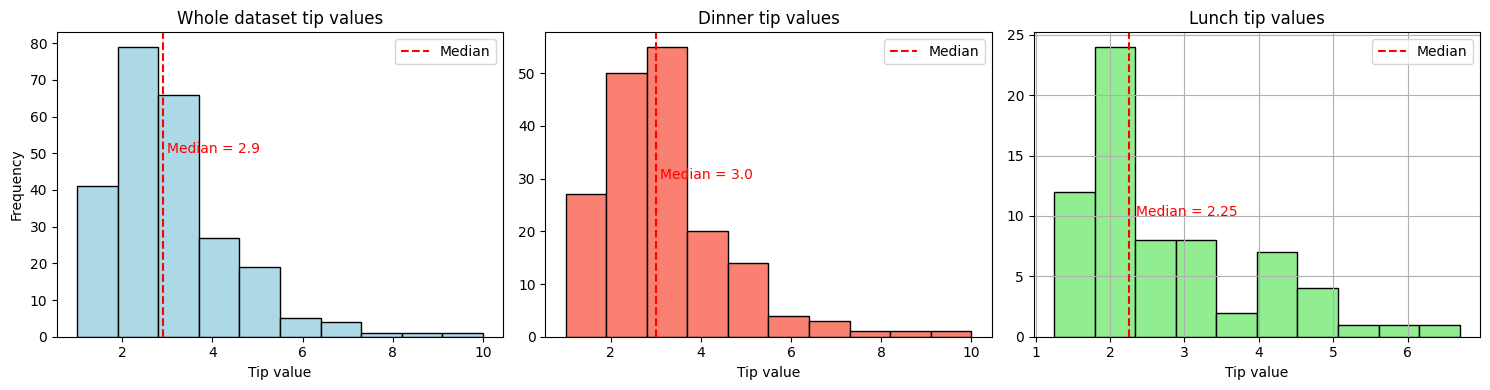

In [70]:
plt.figure(figsize=(15, 4))

# Whole dataset
plt.subplot(1, 3, 1)
plt.hist(df['tip'], color='lightblue', edgecolor='black')
plt.axvline(df['tip'].median(), color='red', linestyle='--', label='Median')
plt.text(df['tip'].median() + 0.1, 50, f"Median = {round(df['tip'].median(), 2)}", color='red')
plt.title('Whole dataset tip values')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.legend()

# Dinner
plt.subplot(1, 3, 2)
plt.hist(dinner_df['tip'], color='salmon', edgecolor='black')
plt.axvline(dinner_median, color='red', linestyle='--', label='Median')
plt.text(dinner_median + 0.1, 30, f"Median = {round(dinner_median, 2)}", color='red')
plt.title('Dinner tip values')
plt.xlabel('Tip value')
plt.legend()

# Lunch
plt.subplot(1, 3, 3)
plt.hist(lunch_df['tip'], color='lightgreen', edgecolor='black')
plt.axvline(lunch_median, color='red', linestyle='--', label='Median')
plt.text(lunch_median + 0.1, 10, f"Median = {round(lunch_median, 2)}", color='red')
plt.title('Lunch tip values')
plt.xlabel('Tip value')
plt.legend()

plt.tight_layout()
plt.grid(True)


In [71]:
from scipy.stats import mannwhitneyu

# Kiểm định 1 phía: Dinner > Lunch
u_stat_1, p_value_1 = mannwhitneyu(dinner_df['tip'], lunch_df['tip'], alternative='greater')

# Kiểm định 2 phía: Dinner ≠ Lunch
u_stat_2, p_value_2 = mannwhitneyu(dinner_df['tip'], lunch_df['tip'], alternative='two-sided')

print(f"U-statistic: {u_stat_1}")
print(f"One-sided p-value: {p_value_1:.4f}")
print(f"Two-sided p-value: {p_value_2:.4f}")


U-statistic: 7063.0
One-sided p-value: 0.0144
Two-sided p-value: 0.0288


 Cả hai p-value đều < 0.05, do đó:

Bác bỏ H₀ ở cả 1 phía và 2 phía

→ ✅ Có sự khác biệt có ý nghĩa thống kê về tiền tip giữa dinner và lunch

→ ✅ Và cụ thể: khách dùng bữa tối tip nhiều hơn

1.  Khách dùng bữa tối có xu hướng tip nhiều hơn
Có thể do:

Bữa tối thường đi theo nhóm (gia đình, bạn bè)

Ngân sách chi tiêu rộng rãi hơn

Dịch vụ vào buổi tối thoải mái, ít gấp gáp

2.  Chiến lược vận hành đề xuất
Tăng cường chất lượng dịch vụ buổi tối

Cử nhân viên xuất sắc phục vụ giờ dinner

Đào tạo kỹ năng upsell cho nhân viên dinner shift

Gợi ý các combo tối ưu hóa tip

Ví dụ: "Bộ combo Dinner Party – phục vụ nhóm 4–6 người, có tặng món tráng miệng cao cấp"

3.  Chiến lược giữ chân khách
Ưu tiên khách quen dinner bằng loyalty program (tích điểm theo tip?)

Tăng trải nghiệm cảm xúc: ánh sáng ấm, nhạc nhẹ, thời gian chờ ngắn

